In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
!pip install citipy
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
mysql-connector-python 8.0.15 requires protobuf>=3.0.0, which is not installed.
You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


606

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).

In [3]:
column_names = ["City","Temperature (F)","Latitude",
                "Longitude","Humidity (%)",
                "Cloudiness (%)", "Wind Speed (mph)"]
selected_cities = pd.DataFrame(columns=column_names)
selected_cities = pd.DataFrame(cities)

In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?"
api_key = '23759e3c994a8a0385570ca8be2f4dc5'

row_count = 1

print("Beginning Data Retrieval")
for index, row in selected_cities.iterrows():
    target_city = row[0]
    target_url = url + "appid=" + api_key + "&units=IMPERIAL" + "&q=" + target_city.replace(" ","+")
    cities_data = requests.get(target_url).json()
    if cities_data["cod"] == "404":
        print("City not found, skipping...")

    else:
        selected_cities.set_value(index, "City", cities_data["name"])
        selected_cities.set_value(index, "Country", cities_data["sys"]["country"])
        selected_cities.set_value(index, "Temperature (F)", cities_data["main"]["temp"])
        selected_cities.set_value(index, "Latitude", cities_data["coord"]["lat"])
        selected_cities.set_value(index, "Longitude", cities_data["coord"]["lon"])
        selected_cities.set_value(index, "Humidity (%)", cities_data["main"]["humidity"])
        selected_cities.set_value(index, "Cloudiness (%)", cities_data["clouds"]["all"])
        selected_cities.set_value(index, "Wind Speed (mph)", cities_data["wind"]["speed"])
        
        print("------------------------")
        print("Processing: City # " , row_count, ' | ' , cities_data["name"], cities_data["sys"]["country"])
        row_count += 1

Beginning Data Retrieval
------------------------
Processing: City #  1  |  Hobart AU
------------------------
Processing: City #  2  |  Kruisfontein ZA
------------------------
Processing: City #  3  |  Vallenar CL
------------------------
Processing: City #  4  |  Mestia GE


C:\Users\lmtaylor\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app
C:\Users\lmtaylor\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  app.launch_new_instance()
C:\Users\lmtaylor\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\lmtaylor\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\lmtaylor\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: set_value is deprecated and will be removed in a future 

City not found, skipping...
------------------------
Processing: City #  5  |  Hithadhoo MV
------------------------
Processing: City #  6  |  Cape Town ZA
------------------------
Processing: City #  7  |  Cabo San Lucas MX
------------------------
Processing: City #  8  |  Jamestown AU
------------------------
Processing: City #  9  |  Bluff AU
City not found, skipping...
------------------------
Processing: City #  10  |  Hermanus ZA
------------------------
Processing: City #  11  |  Victoria BN
------------------------
Processing: City #  12  |  Upernavik GL
------------------------
Processing: City #  13  |  Tagusao PH
------------------------
Processing: City #  14  |  Albany US
------------------------
Processing: City #  15  |  Beloha MG
------------------------
Processing: City #  16  |  Souillac FR
------------------------
Processing: City #  17  |  Tasiilaq GL
------------------------
Processing: City #  18  |  Dikson RU
------------------------
Processing: City #  19  |  A

------------------------
Processing: City #  125  |  Carnarvon ZA
------------------------
Processing: City #  126  |  Itoman JP
------------------------
Processing: City #  127  |  Wahiawa US
City not found, skipping...
------------------------
Processing: City #  128  |  Poum MK
City not found, skipping...
------------------------
Processing: City #  129  |  Acapulco MX
City not found, skipping...
------------------------
Processing: City #  130  |  Nikolskoye RU
City not found, skipping...
------------------------
Processing: City #  131  |  Nanortalik GL
------------------------
Processing: City #  132  |  Punta Arenas CL
------------------------
Processing: City #  133  |  Nhulunbuy AU
------------------------
Processing: City #  134  |  Maniwaki CA
------------------------
Processing: City #  135  |  Luzhany UA
------------------------
Processing: City #  136  |  Ust-Tsilma RU
City not found, skipping...
------------------------
Processing: City #  137  |  Klaebu NO
-------------

------------------------
Processing: City #  246  |  Husavik CA
------------------------
Processing: City #  247  |  Havelock US
------------------------
Processing: City #  248  |  Quelimane MZ
------------------------
Processing: City #  249  |  Cristalina BR
------------------------
Processing: City #  250  |  Vertou FR
------------------------
Processing: City #  251  |  Ixtapa MX
------------------------
Processing: City #  252  |  Namibe AO
------------------------
Processing: City #  253  |  Portland US
------------------------
Processing: City #  254  |  Tarko-Sale RU
------------------------
Processing: City #  255  |  Maracaju BR
------------------------
Processing: City #  256  |  Tromso NO
------------------------
Processing: City #  257  |  Awbari LY
------------------------
Processing: City #  258  |  Broken Hill AU
------------------------
Processing: City #  259  |  Kaitangata NZ
------------------------
Processing: City #  260  |  Rome IT
------------------------
Proce

City not found, skipping...
City not found, skipping...
------------------------
Processing: City #  367  |  Juneau US
------------------------
Processing: City #  368  |  Pangkalanbuun ID
------------------------
Processing: City #  369  |  Vigrestad NO
------------------------
Processing: City #  370  |  Constitucion MX
------------------------
Processing: City #  371  |  Ihosy MG
City not found, skipping...
------------------------
Processing: City #  372  |  Hanzhong CN
------------------------
Processing: City #  373  |  Santa Comba ES
------------------------
Processing: City #  374  |  Menongue AO
------------------------
Processing: City #  375  |  Klaksvik FO
------------------------
Processing: City #  376  |  Diego de Almagro CL
------------------------
Processing: City #  377  |  Yabelo ET
City not found, skipping...
City not found, skipping...
------------------------
Processing: City #  378  |  Road Town VG
City not found, skipping...
City not found, skipping...
City not 

------------------------
Processing: City #  487  |  Albury AU
------------------------
Processing: City #  488  |  Cockburn Town TC
------------------------
Processing: City #  489  |  Jumla NP
------------------------
Processing: City #  490  |  Thornhill GB
------------------------
Processing: City #  491  |  Tiznit MA
------------------------
Processing: City #  492  |  Sainte-Maxime FR
------------------------
Processing: City #  493  |  Ust-Barguzin RU
------------------------
Processing: City #  494  |  Medicine Hat CA
------------------------
Processing: City #  495  |  Bayan MN
------------------------
Processing: City #  496  |  Lichtenburg ZA
------------------------
Processing: City #  497  |  Quatre Cocos MU
City not found, skipping...
City not found, skipping...
------------------------
Processing: City #  498  |  Mount Pleasant US
------------------------
Processing: City #  499  |  Ulaangom MN
------------------------
Processing: City #  500  |  Baruun-Urt MN
----------

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
selected_cities.to_csv('WeatherPy.csv')
selected_cities.head(10)

,0,City,Country,Temperature (F),Latitude,Longitude,Humidity (%),Cloudiness (%),Wind Speed (mph)
0,hobart,Hobart,AU,66.43,-42.88,147.33,82.0,75.0,6.93
1,kruisfontein,Kruisfontein,ZA,68.82,-34.00,24.73,96.0,88.0,13.69
2,vallenar,Vallenar,CL,55.68,-28.58,-70.76,71.0,0.0,2.84
3,mestia,Mestia,GE,3.75,43.04,42.73,65.0,0.0,1.28
4,illoqqortoormiut,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,hithadhoo,Hithadhoo,MV,84.12,-0.60,73.08,100.0,88.0,2.62
6,cape town,Cape Town,ZA,64.22,-33.93,18.42,88.0,0.0,9.17
7,cabo san lucas,Cabo San Lucas,MX,72.05,22.89,-109.91,43.0,5.0,6.93
8,jamestown,Jamestown,AU,78.27,-33.21,138.60,85.0,0.0,2.17
9,bluff,Bluff,AU,88.98,-23.58,149.07,66.0,0.0,4.41


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

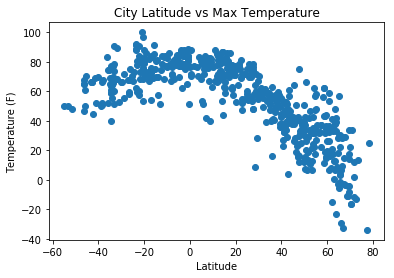

In [17]:
plt.scatter(selected_cities['Latitude'],selected_cities['Temperature (F)'])

plt.title('City Latitude vs Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.savefig('../Images/Temperature.png')
plt.show()

#### Latitude vs. Humidity Plot

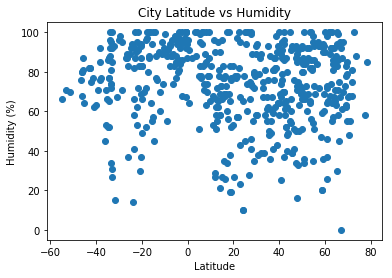

In [18]:
plt.scatter(selected_cities['Latitude'],selected_cities['Humidity (%)'])

plt.title('City Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('../Images/Humidity.png')
plt.show()

#### Latitude vs. Cloudiness Plot

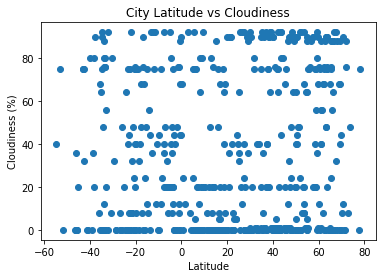

In [19]:
plt.scatter(selected_cities['Latitude'],selected_cities['Cloudiness (%)'])

plt.title('City Latitude vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig('../Images/Cloudiness.png')
plt.show()

#### Latitude vs. Wind Speed Plot

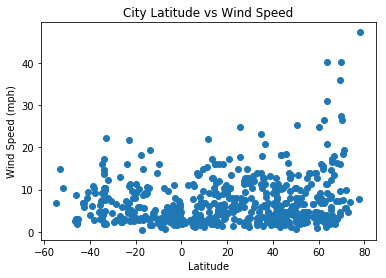

In [20]:
plt.scatter(selected_cities['Latitude'],selected_cities['Wind Speed (mph)'])

plt.title('City Latitude vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig('../Images/Wind Speed.png')
plt.show()

Observations

- Latitude doesn't seem to have any effect on cloudiness
- 60 degrees north of the equator is far colder on average than 60 degrees south of the equator
- Average wind speed doesn't seem to be effected by latitude outside of more extreme latitudes, likely at higher altitudes